In [1]:
from tensorflow import keras
import tensorflow  as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [5]:
x_train = x_train.reshape((-1, 28,28, 1)).astype('float32') / 255
x_test = x_test.reshape((-1, 28,28, 1)).astype('float32') / 255

### Model Definition

In [9]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters =32, kernel_size = (3,3), input_shape =(28, 28, 1),  activation = 'relu'))
model.add(keras.layers.MaxPool2D((2,2)))

model.add(keras.layers.Conv2D(filters =32, kernel_size = (3,3), input_shape =(28, 28, 1),  activation = 'relu'))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Flatten())


model.add(keras.layers.Dense(units = 256, activation= 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(units = 128, activation= 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(units = 10, activation= 'sigmoid'))


In [13]:
model.compile(loss= tf.losses.sparse_categorical_crossentropy,  optimizer = tf.optimizers.Adam(), metrics =['accuracy'])

In [14]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)              

In [15]:
hist = model.fit(x_train, y_train, epochs = 10 , batch_size = 128, validation_data= (x_test, y_test))

Epoch 1/10
469/469 [==============================] - 39s 81ms/step - loss: 0.0924 - accuracy: 0.9737 - val_loss: 0.0393 - val_accuracy: 0.9869
Epoch 2/10
469/469 [==============================] - 38s 81ms/step - loss: 0.0689 - accuracy: 0.9807 - val_loss: 0.0374 - val_accuracy: 0.9885
Epoch 3/10
469/469 [==============================] - 39s 83ms/step - loss: 0.0568 - accuracy: 0.9844 - val_loss: 0.0285 - val_accuracy: 0.9910
Epoch 4/10
469/469 [==============================] - 38s 81ms/step - loss: 0.0481 - accuracy: 0.9866 - val_loss: 0.0284 - val_accuracy: 0.9904
Epoch 5/10
469/469 [==============================] - 38s 82ms/step - loss: 0.0434 - accuracy: 0.9874 - val_loss: 0.0263 - val_accuracy: 0.9915
Epoch 6/10
469/469 [==============================] - 37s 79ms/step - loss: 0.0371 - accuracy: 0.9897 - val_loss: 0.0250 - val_accuracy: 0.9931
Epoch 7/10
469/469 [==============================] - 37s 79ms/step - loss: 0.0327 - accuracy: 0.9904 - val_loss: 0.0258 - val_accuracy:

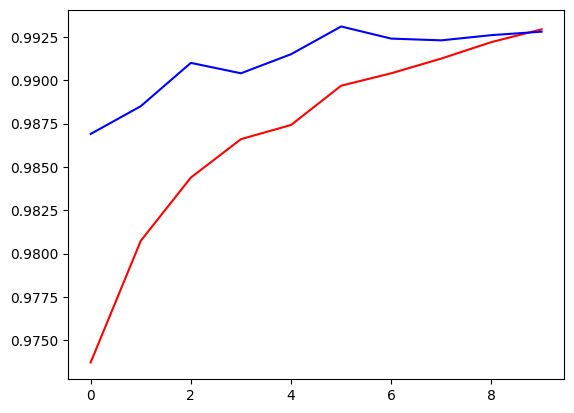

In [16]:
plt.plot(hist.history['accuracy'], color = 'r')
plt.plot(hist.history['val_accuracy'], color = 'b')